[View in Colaboratory](https://colab.research.google.com/github/rdenadai/dsp_study_notebooks/blob/master/notebooks/dsp101a.ipynb)

## DSP 101a

Experiments on Digital Signal Processing, ranging from random generated signals, voice and images!

In these experiments, we are not analysing signals in the range of DSP but also with an statistical view...

To build this document we use a lot of resources, here are some of the most important.
- References:
 - [DSP Guide](http://www.dspguide.com)
 - [DSP Tutorial](https://www.tutorialspoint.com/digital_signal_processing/index.htm)
 - [Plotly FFT Filters](https://plot.ly/python/fft-filters/)
 - [Digital Signal Processing {youtube}](https://www.youtube.com/playlist?list=PLuh62Q4Sv7BUSzx5Jr8Wrxxn-U10qG1et)
 - [Signal Processing 101 {youtube}](https://www.youtube.com/watch?v=KZd68xgasIU&list=PLJ-OcUCIty7evBmHvYRv66RcuziszpSFB)
 - [All Signal Processing {youtube}](https://www.youtube.com/user/allsignalprocessing/playlists)

In [0]:
import math
import random
import numpy as np
import pandas as pd
from scipy.stats import norm
from scipy.signal import resample
from scipy import interpolate
from scipy import signal
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from mpl_toolkits.axes_grid1 import ImageGrid
from IPython.display import Audio

%matplotlib inline

def normalization(x):
    return (((x - min(x)) / (max(x) - min(x))) * 255).astype('int64')

### Signal and Normal Distribution

Bellow we are making some tests using a [Normal Distribution](https://en.wikipedia.org/wiki/Normal_distribution), to create a normal distribute signal, representing some random signal... The signal is also normalize between values range from 0 (zero) up to 255 (255) just to make a range of integer values.

#### Normalization
The normalization formula used here is the default [Feature Scaling](https://en.wikipedia.org/wiki/Feature_scaling), that can be visualize bellow or on the wikipedia page.

$x' = \frac{x - min(x)}{max(x) - min(x)}$


#### Wrap up
Since, numpy allow us to operate algebric operations in the entire array, we can simply create a python function which has the exact same math formula show above. With the minor difference, that we want that our range goes from 0 to 255, this way we must multiply the contents of the array by 255.


After this generated signal (which is show in figure 1), we show it's histogram in which we can see a default Bell Curve, a standard representation of a normal distribution (figure 2).

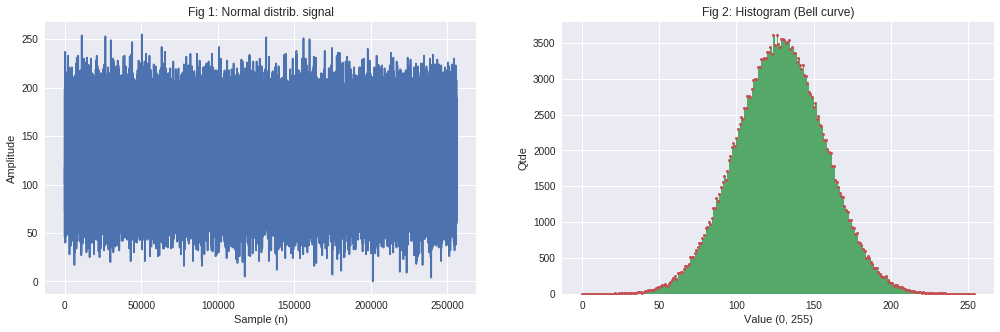

In [2]:
N = 256000
mu, sigma = 0, 10
sig = normalization(np.random.normal(mu, sigma, N))

hist, edges = np.histogram(sig, bins=list(range(0, 256)))

fig = plt.figure(1, figsize=(17, 5))
plt.subplot(121)
plt.title('Fig 1: Normal distrib. signal')
plt.xlabel('Sample (n)')
plt.ylabel('Amplitude')
plt.plot(sig)
plt.subplot(122)
plt.title('Fig 2: Histogram (Bell curve)')
plt.xlabel('Value (0, 255)')
plt.ylabel('Qtde')
plt.plot(hist, 'bo', color='C2', markersize=3)
plt.hist(sig, bins=list(range(0, 255)), color='C1')
plt.show()

### Mean and Standard Deviation

To calculate the mean of the signal data, we can use all the data points or calculate using histogram, which is faster because we are only calculate in a small sized data.

The same could be accomplished for the standard deviation...

Calculate mean from histogram ($H_i$):

$\mu = \frac{1}{N} \sum_{i=0}^{M-1} i H_i$

Calculate std from histogram ($H_i$):

$\sigma^2 = \frac{1}{N-1} \sum_{i=0}^{M-1} (i-\mu)^2 H_i$

In [3]:
hist_mean = sum([i * hist[i] for i in range(0, 255)]) / N
hist_std = math.sqrt(sum([((i - hist_mean)**2) * hist[i] for i in range(0, 255)]) / (N - 1))

print('Mean using the signal:', np.mean(sig))
print('Mean using histogram:', hist_mean)
print('Std. using the signal:', np.std(sig))

print('Std. using histogram:', hist_std)

Mean using the signal: 128.23703125
Mean using histogram: 128.23702734375
Std. using the signal: 28.87069292442638
Std. using histogram: 28.870732229047455


### Probability Mass Function (PMF)

Given we have the histogram of the random signal, its also possible to calculate de PMF (Probability Mass Function) of a distribution.

To get the values of a PMF just devide each value of the histogram by the total number of samples.

$pmf = \frac{H_i}{N}$

This will give the probability of occurence of each value. Not the y-axis values change to be percentage (%). The total sum of the PMF (give is a probability) should be equals to 1.

$\sum_{i=0}^{M-1}pmf_i = 1$

PMF sum:  1.0


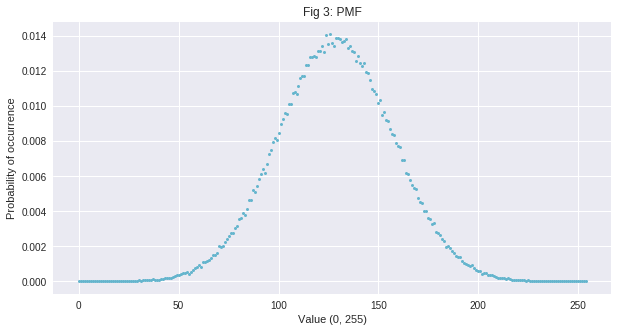

In [4]:
pmf = hist / N
print('PMF sum: ', sum(pmf))

fig = plt.figure(1, figsize=(10, 5))
plt.title('Fig 3: PMF')
plt.xlabel('Value (0, 255)')
plt.ylabel('Probability of occurrence')
plt.plot(pmf, 'bo', color='C5', markersize=3)
plt.show()

Using this idea, one can calculate the probability of a value bean generated.

Suppose we want to know the probability of values between 150 and 200... Just some all probability between this.

In [5]:
print('Prob. of values 150 to 200: ', round(sum(pmf[150:200]) * 100, 3), '%')

Prob. of values 150 to 200:  22.459 %


### Normal Distribution (PDF, CDF)

Just like having the PMF we also can use the **PDF** (*Probability Density Function*) ... Bellow is the PDF of a few Normal Distribution. To calculate the probability of this curves we need to integrate, calculate the so call **CDF** (*Cumulative Distribution Function*).

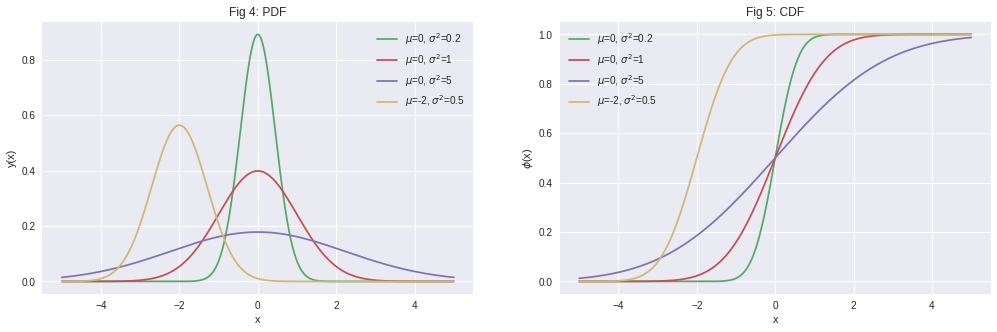

In [6]:
space = np.linspace(-5, 5, N)

def normpdf(x, mean, sd):
    var = np.float(sd)**2
    denom = (2*np.pi*var)**.5
    num = np.exp(-(x-np.float(mean))**2/(2*var))
    return num/denom

px1 = norm(0, math.sqrt(.2))
px2 = norm(0, math.sqrt(1))
px3 = norm(0, math.sqrt(5))
px4 = norm(-2, math.sqrt(.5))

fig = plt.figure(1, figsize=(17, 5))
plt.subplot(121)
plt.title('Fig 4: PDF')
plt.xlabel('x')
plt.ylabel('y(x)')
plt.plot(space, px1.pdf(space), color='C1', markersize=3, label='$\mu$=0, $\sigma^2$=0.2')
plt.plot(space, px2.pdf(space), color='C2', markersize=3, label='$\mu$=0, $\sigma^2$=1')
plt.plot(space, px3.pdf(space), color='C3', markersize=3, label='$\mu$=0, $\sigma^2$=5')
plt.plot(space, px4.pdf(space), color='C4', markersize=3, label='$\mu$=-2, $\sigma^2$=0.5')
plt.legend()

plt.subplot(122)
plt.title('Fig 5: CDF')
plt.xlabel('x')
plt.ylabel('$\phi$(x)')
plt.plot(space, px1.cdf(space), color='C1', markersize=3, label='$\mu$=0, $\sigma^2$=0.2')
plt.plot(space, px2.cdf(space), color='C2', markersize=3, label='$\mu$=0, $\sigma^2$=1')
plt.plot(space, px3.cdf(space), color='C3', markersize=3, label='$\mu$=0, $\sigma^2$=5')
plt.plot(space, px4.cdf(space), color='C4', markersize=3, label='$\mu$=-2, $\sigma^2$=0.5')
plt.legend()

plt.show()

### Digital Noise Generation

Bellow we describe de [Central Limit Theorem](https://en.wikipedia.org/wiki/Central_limit_theorem), which states that defining a random variable, the tendency of the histogram to appear a bell curve rises when multiple times the random variable appears.

Mean:  130.84443359375
Std :  27.817646122776033


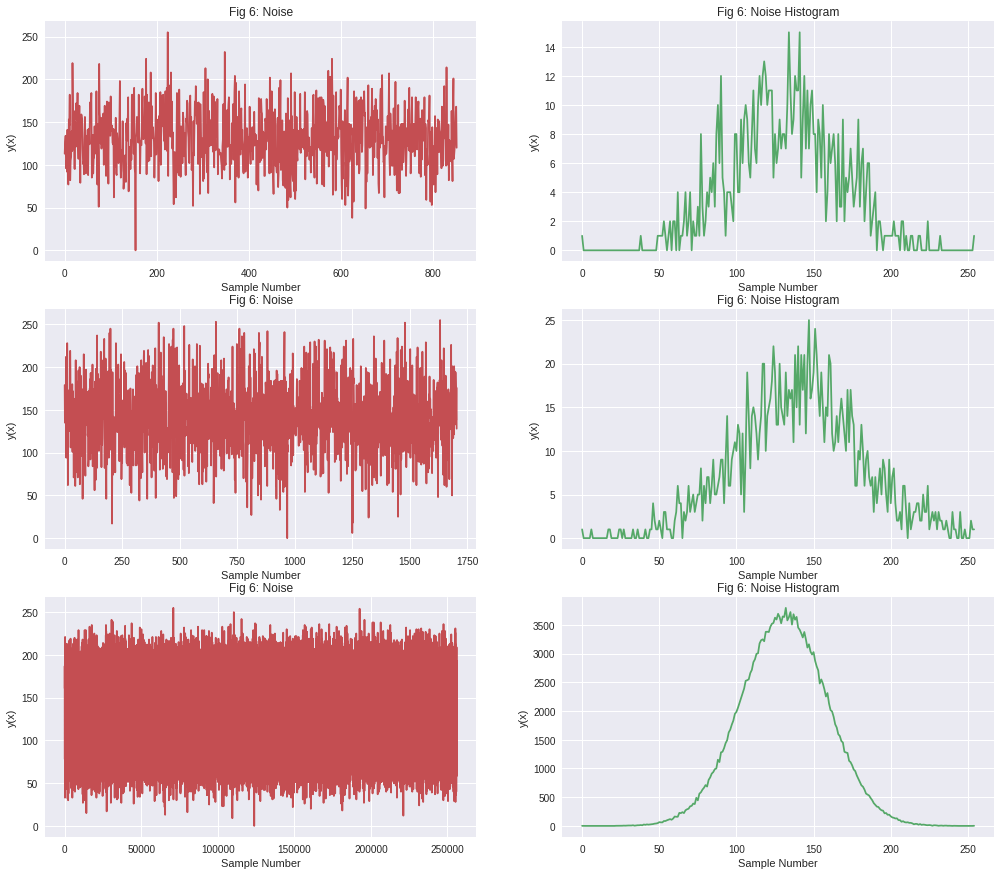

In [7]:
def random_noise(qtd):
    rnoise = []
    for _ in range(0, qtd):
        R1, R2 = np.random.random(), np.random.random()
        x = ((-2*np.log(R1))**.5) * math.cos(2*math.pi*R2)
        rnoise.append(x)
    rnoise = normalization(np.array(rnoise))
    hist, edges = np.histogram(rnoise, bins=list(range(0, 256)))
    return rnoise, hist

rnoise0, hist0 = random_noise(int(N/300))
rnoise1, hist1 = random_noise(int(N/150))
rnoise2, hist2 = random_noise(N)
print('Mean: ', np.mean(rnoise2))
print('Std : ', np.std(rnoise2))

fig = plt.figure(6, figsize=(17, 15))

plt.subplot(321)
plt.title('Fig 6: Noise')
plt.xlabel('Sample Number')
plt.ylabel('y(x)')
plt.plot(rnoise0, color='C2', markersize=3)
plt.subplot(322)
plt.title('Fig 6: Noise Histogram')
plt.xlabel('Sample Number')
plt.ylabel('y(x)')
plt.plot(hist0, color='C1', markersize=3)

plt.subplot(323)
plt.title('Fig 6: Noise')
plt.xlabel('Sample Number')
plt.ylabel('y(x)')
plt.plot(rnoise1, color='C2', markersize=3)
plt.subplot(324)
plt.title('Fig 6: Noise Histogram')
plt.xlabel('Sample Number')
plt.ylabel('y(x)')
plt.plot(hist1, color='C1', markersize=3)

plt.subplot(325)
plt.title('Fig 6: Noise')
plt.xlabel('Sample Number')
plt.ylabel('y(x)')
plt.plot(rnoise2, color='C2', markersize=3)
plt.subplot(326)
plt.title('Fig 6: Noise Histogram')
plt.xlabel('Sample Number')
plt.ylabel('y(x)')
plt.plot(hist2, color='C1', markersize=3)

plt.show()

### Sampling Theorem (Nyquist-Shannon)

The sampling theorem states that any signal should be sampled at least 2x it's bandlimited frequency. [wiki](https://en.wikipedia.org/wiki/Nyquist%E2%80%93Shannon_sampling_theorem)

> *A sufficient sample-rate is therefore $2B$ samples/second, or anything larger. Equivalently, for a given sample rate $F_s$, perfect reconstruction is guaranteed possible for a bandlimit $B < \frac{F_s}{2}$.*

This means that $F_s > 2 \times B$. 

As an example imagine the following sine wave signal.

To build a [Sine Wave](https://en.wikipedia.org/wiki/Sine_wave), we can use the following formula:

$y(t) = A \sin(2\pi ft + \phi)$


 - $A$ = the amplitude, the peak deviation of the function from zero.

 - $f$ = the ordinary frequency, the number of oscillations (cycles) that occur each second of time.

 - $\omega$ = $2\pi f$, the angular frequency, the rate of change of the function argument in units of radians per second

 - $\phi$ = the phase, specifies (in radians) where in its cycle the oscillation is at $t = 0$.

In [0]:
def sine(A=4096, f=1, t=1, Fs=1024, phi=0):
    # A = 4096              # amplitude (deslocamento vertical)
    # phi = 0               # fase (deslocamento horizontal)
    # f = 1                 # frequencia em hz (quantas oscilações em 1 segundo)
    # t = 1                 # tempo em segundos
    # Fs = 200              # frequencia de amostragem (pontos por segundo)
    n = np.arange(Fs * t)
    return (A * np.sin((((2 * np.pi * f) * n) / Fs) + phi)).astype('int64')

def resamp_presenter(x, num):
    y = np.zeros(x.size)
    y[y==0] = np.nan
    y[::num] = x[::num]
    return y, math.ceil(len(x) / num)

def resamp(x, num):
    return x[::num]

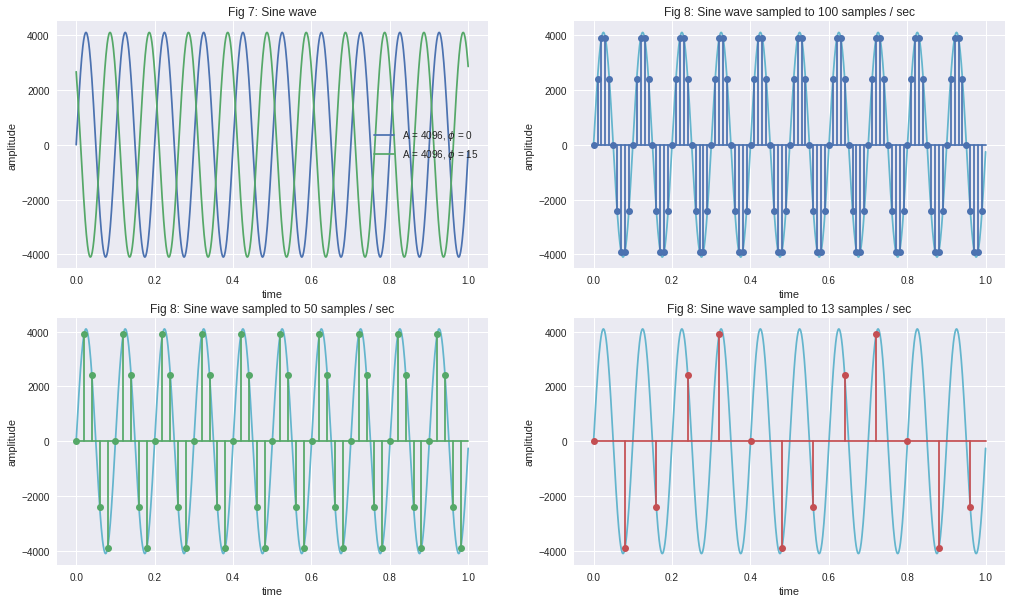

In [15]:
# ----------
sinewave = sine(f=10, t=1, Fs=1000)
sinewave2 = sine(f=10, t=1, Fs=1000, phi=15)

size = len(sinewave)

fig = plt.figure(6, figsize=(17, 10))
plt.subplot(221)
plt.plot(np.linspace(0, 1, size), sinewave, color='C0', markersize=3, label='A = 4096, $\phi$ = 0')
plt.plot(np.linspace(0, 1, size), sinewave2, color='C1', markersize=3, label='A = 4096, $\phi$ = 15')
plt.title('Fig 7: Sine wave')
plt.xlabel('time')
plt.ylabel('amplitude')
plt.legend()

sinewave_sampled0, p0 = resamp_presenter(sinewave, 10)
sinewave_sampled1, p1 = resamp_presenter(sinewave, 20)
sinewave_sampled2, p2 = resamp_presenter(sinewave, 80)

plt.subplot(222)
plt.plot(np.linspace(0, 1, size), sinewave, color='C5')
plt.stem(np.linspace(0, 1, len(sinewave_sampled0)), sinewave_sampled0, linefmt='C0', basefmt='C0', markerfmt='C0o')
plt.title('Fig 8: Sine wave sampled to %s samples / sec' % p0)
plt.xlabel('time')
plt.ylabel('amplitude')

plt.subplot(223)
plt.plot(np.linspace(0, 1, size), sinewave, color='C5')
plt.stem(np.linspace(0, 1, len(sinewave_sampled1)), sinewave_sampled1, linefmt='C1', basefmt='C1', markerfmt='C1o')
plt.title('Fig 8: Sine wave sampled to %s samples / sec' % p1)
plt.xlabel('time')
plt.ylabel('amplitude')

plt.subplot(224)
plt.plot(np.linspace(0, 1, size), sinewave, color='C5')
plt.stem(np.linspace(0, 1, len(sinewave_sampled2)), sinewave_sampled2, linefmt='C2', basefmt='C2', markerfmt='C2o')
plt.title('Fig 8: Sine wave sampled to %s samples / sec' % p2)
plt.xlabel('time')
plt.ylabel('amplitude')

plt.show()

**Sampled sine wave example**

Lets build a simple signal representing the major A octave. And let's sample this signal with reduction at x2 its value.

This means that the original signal which was in 44100 samples/sec ($F_s$) now will have 22050 samples/sec, which will convert the sound to a frequency of 440 Hz.

This is demonstrated bellow... 

 - blue represents original signal, $f = 440 Hz$ and $F_s = 44100 samples/sec$
 - green, show the sampled version of blue by a factor of x 15
 - red, the signal build using the same value of the sampled green. 


In [10]:
# Notes list!
df = pd.DataFrame(
    [['C',130.82], ['C#',138.59], ['D',146.83], ['D#',155.56], ['E',164.81], ['F',174.61], ['F#',185], ['G',196], ['G#',207.65], ['A',220], ['A#',233.08], ['B',246.94], ['C',261.63], ['C#',277.18], ['D',293.66], ['D#',311.13], ['E',329.63], ['F',349.23], ['F#',369.99], ['G',392], ['G#',415.3], ['A',440], ['A#',466.16], ['B',493.88], ['C',523.25], ['C#',554.37], ['D',587.33], ['D#',622.25], ['E',659.26], ['F',698.46], ['F#',739.99], ['G',783.99], ['G#',830.61], ['A',880], ['A#',932.33], ['B',987.77], ['C',1046.5], ['C#',1108.73], ['D',1174.66], ['D#',1244.51], ['E',1318.51], ['F',1396.91], ['F#',1479.98], ['G',1567.98], ['G#',1661.22], ['A',1760], ['A#',1864.66], ['B',1975.53], ['C',2093]],
    columns=['Note', 'Frequency']
)
df.loc[df['Frequency'] == 440]

,Note,Frequency
21,A,440.0


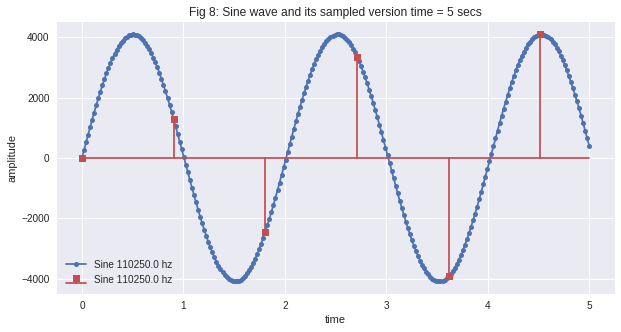

In [11]:
t=5
M=45
major_A = sine(f=440, t=t, Fs=44100)
major_A_sampled, p0 = resamp_presenter(major_A, M)  # reduction - x2B
major_A_sampled_a = resamp(major_A, M)

C = 250
size = len(major_A[:C])

fig = plt.figure(6, figsize=(10, 5))
plt.plot(np.linspace(0, t, size), major_A[:C], color='C0', marker='o', markersize=5, label='Sine %s hz' % (len(major_A) / 2))
plt.stem(np.linspace(0, t, size), major_A_sampled[:C], linefmt='C2', basefmt='C2', markerfmt='C2s', label='Sine %s hz' % (len(major_A_sampled) / 2))
plt.title('Fig 8: Sine wave and its sampled version time = %s secs' % t)
plt.xlabel('time')
plt.ylabel('amplitude')
plt.legend()

plt.show()

In [12]:
r = len(major_A) / t
print(f'Major A with sample of {r}:')
Audio(major_A, rate=r)

Major A with sample of 44100.0:


In [13]:
r = len(major_A_sampled_a) / t
print(f'Major A with sampled at {r}:')
Audio(major_A_sampled_a, rate=r)

Major A with sampled at 980.0:
